In [ ]:
%pip install mlxtend --upgrade

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from matplotlib import pyplot as plt
from sklearn import tree
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import learning_curve
from mlxtend.evaluate import bias_variance_decomp
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv("Shill Bidding Dataset.csv")
df

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


In [ ]:
df.isnull().sum()


Record_ID                 0
Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

In [ ]:
df.drop_duplicates(keep = 'first', inplace = True)
df


,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


In [ ]:
df.drop(["Record_ID","Auction_ID","Bidder_ID"],axis='columns', inplace=True)
df.describe()


,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


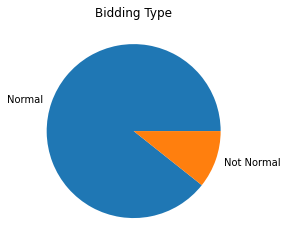

0    5646
1     675
Name: Class, dtype: int64

In [ ]:
classes=df['Class'].value_counts()
plt.pie(classes,labels = ['Normal', 'Not Normal'])  
plt.title ("Bidding Type")
plt.show()
classes

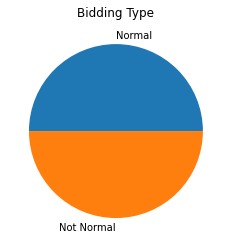

0    5646
1    5646
Name: Class, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

#splitting the data set into training and testing data
X = df.drop(['Class'],axis=1)
y = df["Class"]

smoteSampler = SMOTE(random_state=42)
smoteX,smoteY=smoteSampler.fit_resample(X, y)

#summary of Classes after SMOTE
classes=pd.DataFrame(smoteY,columns=['Class'])['Class'].value_counts()
plt.pie(classes,labels = ['Normal', 'Not Normal'])  
plt.title ("Bidding Type")
plt.show()
classes

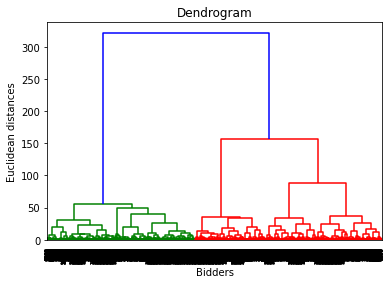

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(smoteX, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Bidders')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
import scipy.cluster.hierarchy as sch


In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')
hc.fit(smoteX)
predicted_labels = hc.labels_
hc.labels_

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

cm = confusion_matrix(smoteY, predicted_labels)


ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [ ]:

from sklearn.decomposition import PCA
#Load Data
pca = PCA(2,random_state=42)
 
#Transform the data
df_pca = pca.fit_transform(smoteX)
df_visual=pd.DataFrame(df_pca,columns=["x","y"])
df_visual["cluster"]= hc.labels_
df_visual


In [ ]:
from matplotlib.pyplot import figure
fig=plt.figure(figsize=(20,10))

plt.scatter(df_visual.loc[df_visual['cluster'] == 0, 'x'], df_visual.loc[df_visual['cluster'] == 0, 'y'], c='red')
plt.scatter(df_visual.loc[df_visual['cluster'] == 1, 'x'], df_visual.loc[df_visual['cluster'] == 1, 'y'], c='blue')

plt.show()


In [ ]:
import seaborn as sns
smoteX["cluster"]= hc.labels_

sns.pairplot(smoteX,hue='cluster')

In [ ]:
import seaborn as sns
smoteX["Class"]= smoteY
sns.pairplot(df,hue='Class')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(smoteY, hc.labels_)


In [ ]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2, random_state=0).fit(smoteX)
predicted_labels = kmeans.labels_
kmeans.labels_

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

cm = confusion_matrix(smoteY, kmeans.labels_)


ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [ ]:
from sklearn.decomposition import PCA
#Load Data
pca = PCA(2,random_state=42)
 
#Transform the data
df_pca = pca.fit_transform(smoteX)
Kmeans_df_visual=pd.DataFrame(df_pca,columns=["x","y"])
Kmeans_df_visual["cluster"]= kmeans.labels_
Kmeans_df_visual

In [ ]:
from matplotlib.pyplot import figure
fig=plt.figure(figsize=(20,10))

plt.scatter(Kmeans_df_visual.loc[Kmeans_df_visual['cluster'] == 0, 'x'], Kmeans_df_visual.loc[Kmeans_df_visual['cluster'] == 0, 'y'], c='red')
plt.scatter(Kmeans_df_visual.loc[Kmeans_df_visual['cluster'] == 1, 'x'], Kmeans_df_visual.loc[Kmeans_df_visual['cluster'] == 1, 'y'], c='blue')

plt.show()

In [ ]:
import seaborn as sns
smoteX["cluster"]= kmeans.labels_

sns.pairplot(smoteX,hue='cluster')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(smoteY, kmeans.labels_)